The goal is to parse the Lodders table, then write the following tables:
* Isotope by number
* Isotope by mass
* Element by number
* Element by mass

In [101]:
%matplotlib notebook
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from astropy.table import Table

In [94]:
df = pd.read_csv("tabula-Lodders2010_Chapter_SolarSystemAbundancesOfTheElem.csv",
                names=["1_Z","1_El","1_A","1_pct","1_N","2_Z","2_El","2_A","2_pct","2_N"])
## Split up table into its subtables
subdfs = []
Zrows = list(np.where(df["1_Z"] == "Z")[0])+[len(df)]
print(Zrows)
for i in range(len(Zrows)-1):
    subdfs.append(df.iloc[Zrows[i]+1:Zrows[i+1]])
## Get the columns and stack them
alldfs = []
for subdf in subdfs:
    for num in ["1","2"]:
        cols = ["{}_{}".format(num,x) for x in ["Z","El","A","pct","N"]]
        _df = subdf[cols]
        _df = _df.rename(mapper=lambda x: x.split("_")[1], axis=1)
        alldfs.append(_df)
df = pd.concat(alldfs)
for col in ["Z","A"]:
    x = df[col]
    x[pd.isnull(x)] = -1
    df[col] = x.astype(int)
    df[col][df[col]==-1] = np.nan
for col in ["pct","N"]:
    df[col] = df[col].astype(float)
isotopes = df[pd.notnull(df["Z"])]
isotopes["logN"] = np.log10(isotopes["N"])

[0, 42, 84, 127, 169, 189]


/Users/alexji/anaconda/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/alexji/anaconda/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/alexji/anaconda/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log10
/Users/alexji/anaconda/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the 

In [95]:
isotopes

,Z,El,A,pct,N,logN
1,1.0,H,1.0,99.99810,2.590000e+10,10.413300
2,1.0,H,2.0,0.00194,5.030000e+05,5.701568
4,2.0,He,3.0,0.01660,1.030000e+06,6.012837
5,2.0,He,4.0,99.98340,2.510000e+09,9.399674
7,3.0,Li,6.0,7.58900,4.200000e+00,0.623249
8,3.0,Li,7.0,92.41100,5.140000e+01,1.710963
10,4.0,Be,9.0,100.00000,6.120000e-01,-0.213249
12,5.0,B,10.0,19.82000,3.700000e+00,0.568202
13,5.0,B,11.0,80.18000,1.510000e+01,1.178977
15,6.0,C,12.0,98.88900,7.110000e+06,6.851870


<IPython.core.display.Javascript object>


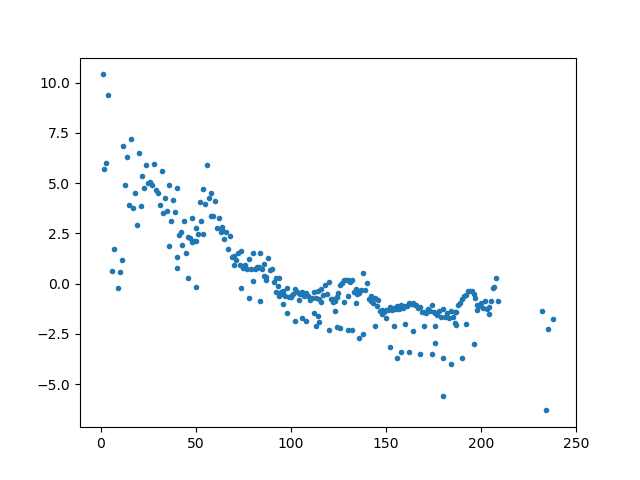

/Users/alexji/anaconda/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log10
  


In [99]:
plt.figure()
plt.plot(isotopes["A"],np.log10(isotopes["N"]),'.')

In [89]:
outdata = []
for Z in np.unique(isotopes["Z"]):
    edf = isotopes[isotopes["Z"] == Z]
    # Z, El, A_avg, Ntot, logNtot
    row = edf.iloc[0]
    Z = row["Z"]
    el = row["El"]
    el = el.replace("*","")
    Ntot = float(edf["N"].sum())
    A = np.sum(edf["A"]*edf["N"])/Ntot
    outdata.append([Z, el, A, Ntot, np.log10(Ntot)])
elems = pd.DataFrame(outdata,columns=["Z","El","A","N","logN"])

In [97]:
elems

,Z,El,A,N,logN
0,1.0,H,1.000019,2.590050e+10,10.413308
1,2.0,He,3.999590,2.511030e+09,9.399852
2,3.0,Li,6.924460,5.560000e+01,1.745075
3,4.0,Be,9.000000,6.120000e-01,-0.213249
4,5.0,B,10.803191,1.880000e+01,1.274158
5,6.0,C,12.011113,7.189900e+06,6.856723
6,7.0,N,14.003656,2.127780e+06,6.327927
7,8.0,O,16.004378,1.573740e+07,7.196933
8,9.0,F,19.000000,8.040000e+02,2.905256
9,10.0,Ne,20.138908,3.292330e+06,6.517503


<IPython.core.display.Javascript object>


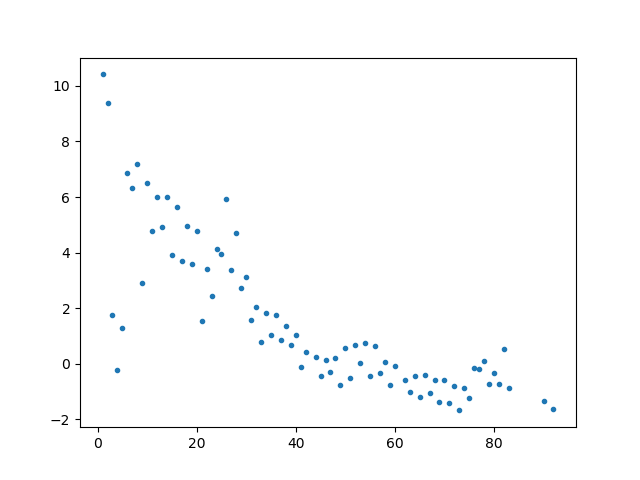

In [100]:
plt.figure()
plt.plot(elems["Z"],elems["logN"],'.')

In [102]:
Table.from_pandas(isotopes).write("lodders10_isotopes.txt",format='ascii.fixed_width_two_line')
Table.from_pandas(elems).write("lodders10_elements.txt",format='ascii.fixed_width_two_line')
